In [6]:

%load_ext autoreload
%autoreload 2
from HospitalData_v20210120 import HospitalData

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
hObj = HospitalData('reported_hospital_utilization_timeseries_20210110_1007.csv', 'MA','20201001','20210109')

Finished parsing file /Users/cuongnguyen/Desktop/covid_forecast_data/reported_hospital_utilization_timeseries_20210110_1007.csv

Parsing completed. Parsed 100 lines in 0.103211 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,float,int,int,int,float,int,int,int,float,int,int,int,float,int,int,int,float,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/covid_forecast_data/reported_hospital_utilization_timeseries_20210110_1007.csv

Parsing completed. Parsed 16987 lines in 0.127495 secs.

[20200425, 20200904, 20200412, 20201015, 20200506, 20200403, 20200803, 20200824, 20200719, 20200122, 20200622, 20200204, 20200216, 20201109, 20201114, 20200810, 20200119, 20200525, 20200304, 20200610, 20200104, 20200919, 20200507, 20201020, 20200609, 20200126, 20201220, 20200827, 20200805, 20201014, 20200713, 20200701, 20200228, 20210101, 20200224, 20200110, 20201004, 20200826, 20200429, 20200131, 20200814, 20200410, 20201128, 20201022, 20200802, 20200129, 20200515, 20200829, 20200405, 20200617, 20201228, 20201023, 20200422, 20200220, 20200414, 20200301, 20200910, 20200112, 20200118, 20200316, 20200428, 20200222, 20200915, 20200621, 20210102, 20201209, 20200516, 20200918, 20200225, 20201018, 20200205, 20200614, 20201103, 20200529, 20200815, 20200128, 20200716, 20200616, 20200518, 20200509, 20200924, 20200923, 20201029, 20200720, 20200325, 20200703, 20201101, 20200928, 20200710, 20210103, 20200307, 20200323, 20200305, 20200116, 20200618, 20201017, 20200109, 20200519, 20200916, 20201001,

In [14]:
hObj.filtered_data.select_columns(['date','staffed_icu_adult_patients_confirmed_covid']).sort(['date'],ascending=True)

date,staffed_icu_adult_patients_confirmed_covid ...
20200702,0
20200703,None
20200704,None
20200705,None
20200706,None
20200707,None
20200708,None
20200709,None
20200710,None
20200711,None


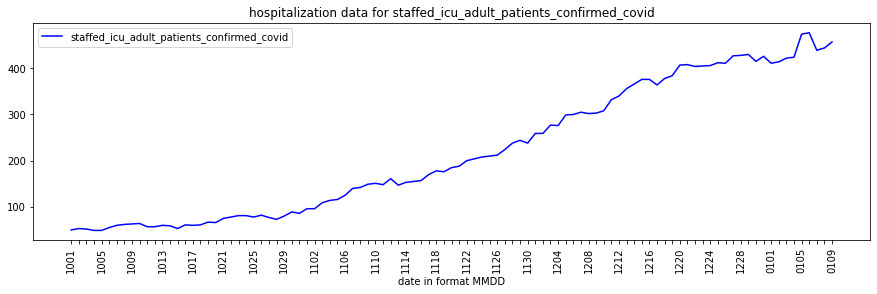

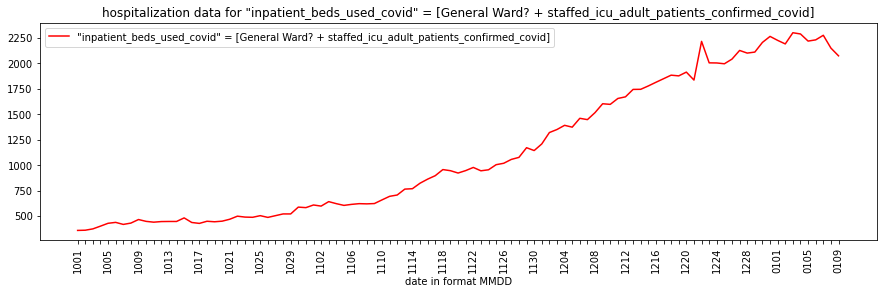

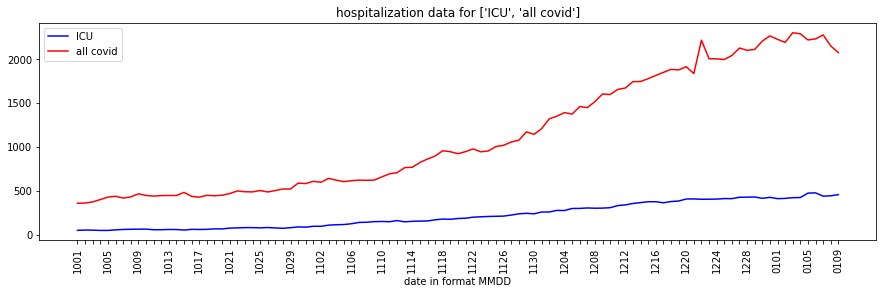

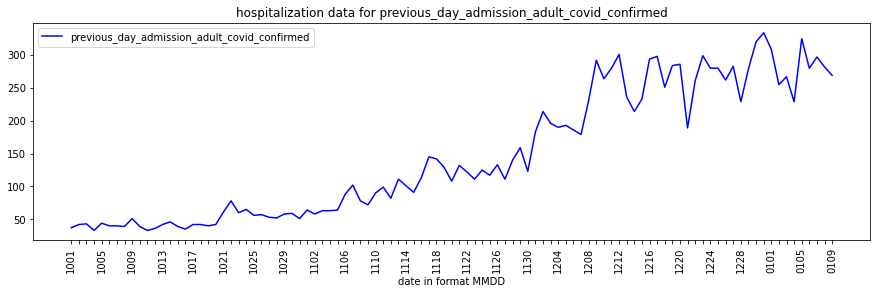

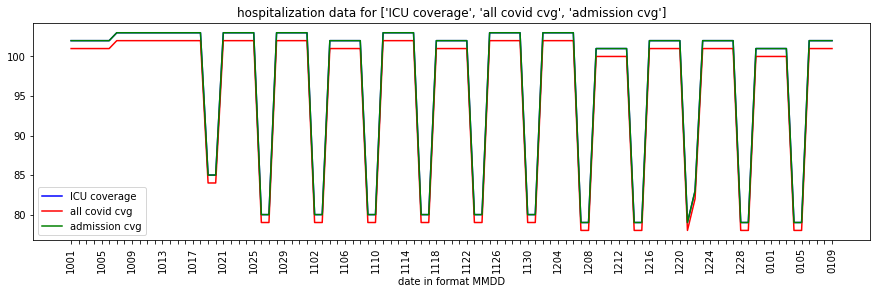

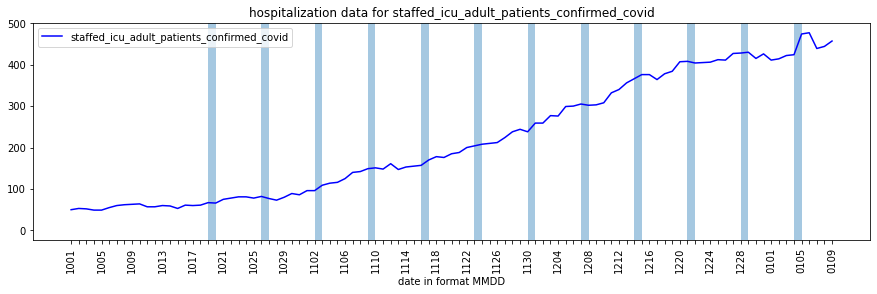

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

def sparsify_dates_labels(dates_list):
    for dd, date in enumerate(dates_list):
        if dd%4 == 0:
            dates_list[dd] = str(dates_list[dd])[-4:]
            pass
        else:
            dates_list[dd] = ''
    return dates_list

def plot_hosp(dates_list,y_data,color,label, fill_between=[]):#fill_between = boolean_ones_zeros of len dates_list
    plt.figure(figsize=(15,4))
    if type(y_data)==list and type(color)==list and type(label)==list:
        for idx,(y,c,l) in enumerate(zip(y_data,color,label)):
            plt.plot(y,color=c,label=l)
    else:
        plt.plot(y_data,color=color,label=label)
    if len(fill_between) > 0:
        ax = plt.gca()
        ax.fill_between(list(range(len(dates_list))), 0, 1, where=fill_between, alpha=0.4, transform=ax.get_xaxis_transform()) 
    plt.xticks(ticks=list(range(len(dates_list))),labels=sparsify_dates_labels(dates_list),rotation='vertical');
    plt.xlabel('date in format MMDD')
    plt.legend()
    plt.title('hospitalization data for '+str(label));
    plt.show()


dates_list = list(hObj.filtered_data['date'])
fill_between = []
plot_hosp(dates_list,hObj.filtered_data['staffed_icu_adult_patients_confirmed_covid'],color='b',label='staffed_icu_adult_patients_confirmed_covid', fill_between=fill_between)
plot_hosp(dates_list,hObj.filtered_data['inpatient_beds_used_covid'],color='r',label='"inpatient_beds_used_covid" = [General Ward? + staffed_icu_adult_patients_confirmed_covid]', fill_between=fill_between)
plot_hosp(dates_list,[hObj.filtered_data['staffed_icu_adult_patients_confirmed_covid'],hObj.filtered_data['inpatient_beds_used_covid']]\
          ,color=['b','r'],label=['ICU', 'all covid'], fill_between=fill_between)
plot_hosp(dates_list,hObj.filtered_data['previous_day_admission_adult_covid_confirmed'],color='b',label='previous_day_admission_adult_covid_confirmed', fill_between=fill_between)
plot_hosp(dates_list,[hObj.filtered_data['staffed_icu_adult_patients_confirmed_covid_coverage'],hObj.filtered_data['inpatient_beds_used_covid_coverage'],hObj.filtered_data['previous_day_admission_adult_covid_confirmed_coverage']]\
          ,color=['b','r','g'],label=['ICU coverage', 'all covid cvg','admission cvg'], fill_between=fill_between)



####UNCOMMENT here to have shaded regions of bad coverage weekends #############
fill_between = np.zeros(len(dates_list))
fill_between[hObj.filtered_data['inpatient_beds_used_covid_coverage'].to_numpy()<hObj.filtered_data['inpatient_beds_used_covid_coverage'].mean()] = 1
# print(hObj.filtered_data['inpatient_beds_used_covid_coverage'].mean(), fill_between,'fill_between')

plot_hosp(dates_list,hObj.filtered_data['staffed_icu_adult_patients_confirmed_covid'],color='b',label='staffed_icu_adult_patients_confirmed_covid', fill_between=fill_between)
# plot_hosp(dates_list,hObj.filtered_data['inpatient_beds_used_covid'],color='r',label='"inpatient_beds_used_covid" = [General Ward? + staffed_icu_adult_patients_confirmed_covid]', fill_between=fill_between)
# plot_hosp(dates_list,[hObj.filtered_data['staffed_icu_adult_patients_confirmed_covid'],hObj.filtered_data['inpatient_beds_used_covid']]\
#           ,color=['b','r'],label=['ICU', 'all covid'], fill_between=fill_between)
# plot_hosp(dates_list,hObj.filtered_data['previous_day_admission_adult_covid_confirmed'],color='b',label='previous_day_admission_adult_covid_confirmed', fill_between=fill_between)
# plot_hosp(dates_list,[hObj.filtered_data['staffed_icu_adult_patients_confirmed_covid_coverage'],hObj.filtered_data['inpatient_beds_used_covid_coverage'],hObj.filtered_data['previous_day_admission_adult_covid_confirmed_coverage']]\
#           ,color=['b','r','g'],label=['ICU coverage', 'all covid cvg','admission cvg'], fill_between=fill_between)



## source of data:

reported_hospital_utilization_timeseries_20210110_1007.csv was downloaded from https://healthdata.gov/dataset/covid-19-reported-patient-impact-and-hospital-capacity-state-timeseries/resource/3ce11e2c#{}

### relevant fields used from csv
https://healthdata.gov/covid-19-reported-patient-impact-and-hospital-capacity-state-data-dictionary

inpatient_beds_used_covid: Reported patients currently hospitalized in an inpatient bed who have suspected or confirmed COVID-19 in this state

inpatient_beds_used_covid_coverage: Number of hospitals reporting "inpatient_beds_used_covid" in this state

previous_day_admission_adult_covid_confirmed: Number of patients who were admitted to an adult inpatient bed on the previous calendar day who had confirmed COVID-19 at the time of admission in this state

previous_day_admission_adult_covid_confirmed_coverage: Number of hospitals reporting "previous_day_admission_adult_covid_confirmed" in this state

staffed_icu_adult_patients_confirmed_covid: Reported patients currently hospitalized in an adult ICU bed who have confirmed COVID-19 in this state

staffed_icu_adult_patients_confirmed_covid_coverage: Number of hospitals reporting "staffed_icu_adult_patients_confirmed_covid" in this state


## plots may have labels where <br>
'ICU' ~ staffed_icu_adult_patients_confirmed_covid <br>
'all covid' ~ inpatient_beds_used_covid <br>
'admission' ~ previous_day_admission_adult_covid_confirmed <br>

Note that 'admission' in the plots are of the previous day UNSHIFTED (raw data entries)

shaded regions are based on the criteria: <br> 
hObj.filtered_data['inpatient_beds_used_covid_coverage'].to_numpy < hObj.filtered_data['inpatient_beds_used_covid_coverage'].mean()